In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install sklearn

In [ ]:
df=pd.read_csv('city_day.csv',parse_dates = ["Date"])
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


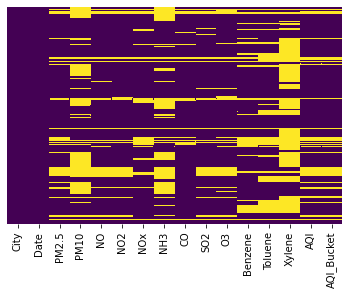

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [ ]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI_Bucket    15.851139
AQI           15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
Date           0.000000
City           0.000000
dtype: float64

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df['Date']=df['Date'].apply(pd.to_datetime)

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df.iloc[:, 1:13] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))

In [ ]:
df


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.000000,0.020000,0.000000,NaN,NaN
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.680000,5.500000,3.770000,NaN,NaN
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.800000,16.400000,2.250000,NaN,NaN
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.430000,10.140000,1.000000,NaN,NaN
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.010000,18.890000,2.780000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory


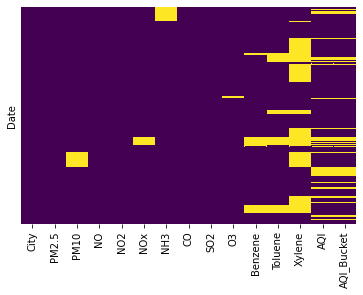

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.iloc[:, 1:13]=df.fillna(df.mean())
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.000000,0.020000,0.000000,NaN,NaN
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.680000,5.500000,3.770000,NaN,NaN
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.800000,16.400000,2.250000,NaN,NaN
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.430000,10.140000,1.000000,NaN,NaN
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.010000,18.890000,2.780000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory


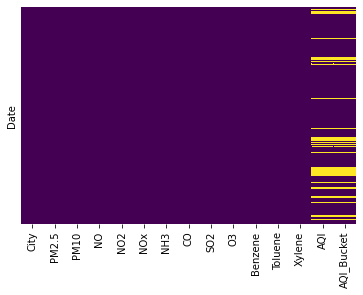

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

In [ ]:
df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

In [ ]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

In [ ]:
df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))

In [ ]:
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

In [ ]:
df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

In [ ]:
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

In [ ]:
df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

In [ ]:
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

In [ ]:
df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

In [ ]:
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

In [ ]:
df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

In [ ]:
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

In [ ]:
df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [ ]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))

In [ ]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.000000,0.020000,0.000000,149.0,NaN,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.680000,5.500000,3.770000,123.0,NaN,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.800000,16.400000,2.250000,300.0,NaN,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.430000,10.140000,1.000000,123.0,NaN,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.010000,18.890000,2.780000,329.0,NaN,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good,50.000000,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory,74.000000,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory,65.000000,36.666667,10.00,22.50,2.50,0.000000,30.000000


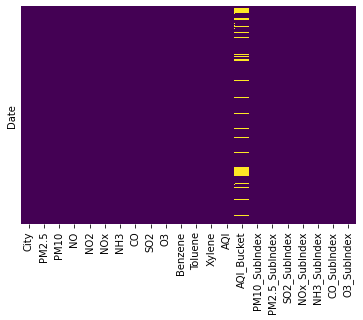

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
from IPython import display 
display.Image("__results___16_0.png",width = 400, height = 200)

In [ ]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'

In [ ]:
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [ ]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.000000,0.020000,0.000000,149.0,Moderate,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.680000,5.500000,3.770000,123.0,Moderate,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.800000,16.400000,2.250000,300.0,Poor,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.430000,10.140000,1.000000,123.0,Moderate,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.010000,18.890000,2.780000,329.0,Very Poor,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good,50.000000,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory,74.000000,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory,65.000000,36.666667,10.00,22.50,2.50,0.000000,30.000000


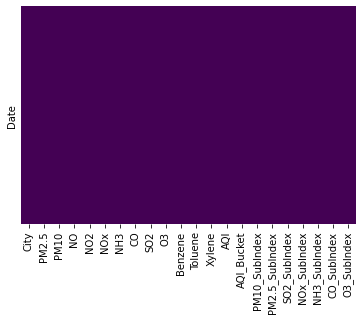

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:

df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

In [ ]:
df_city_day = df.copy()

In [ ]:
df_city_day.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

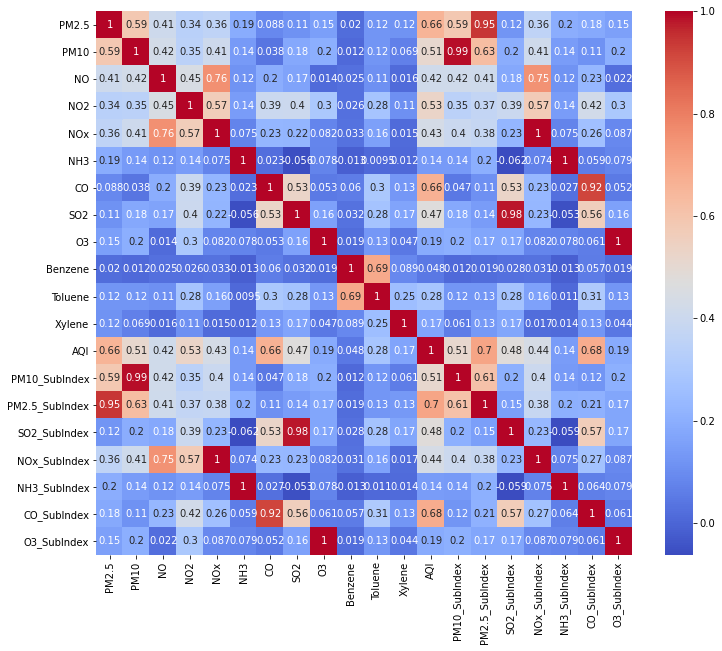

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

In [ ]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
df_city_day = df_city_day[pollutants]

Distribution of different pollutants in last 5 years


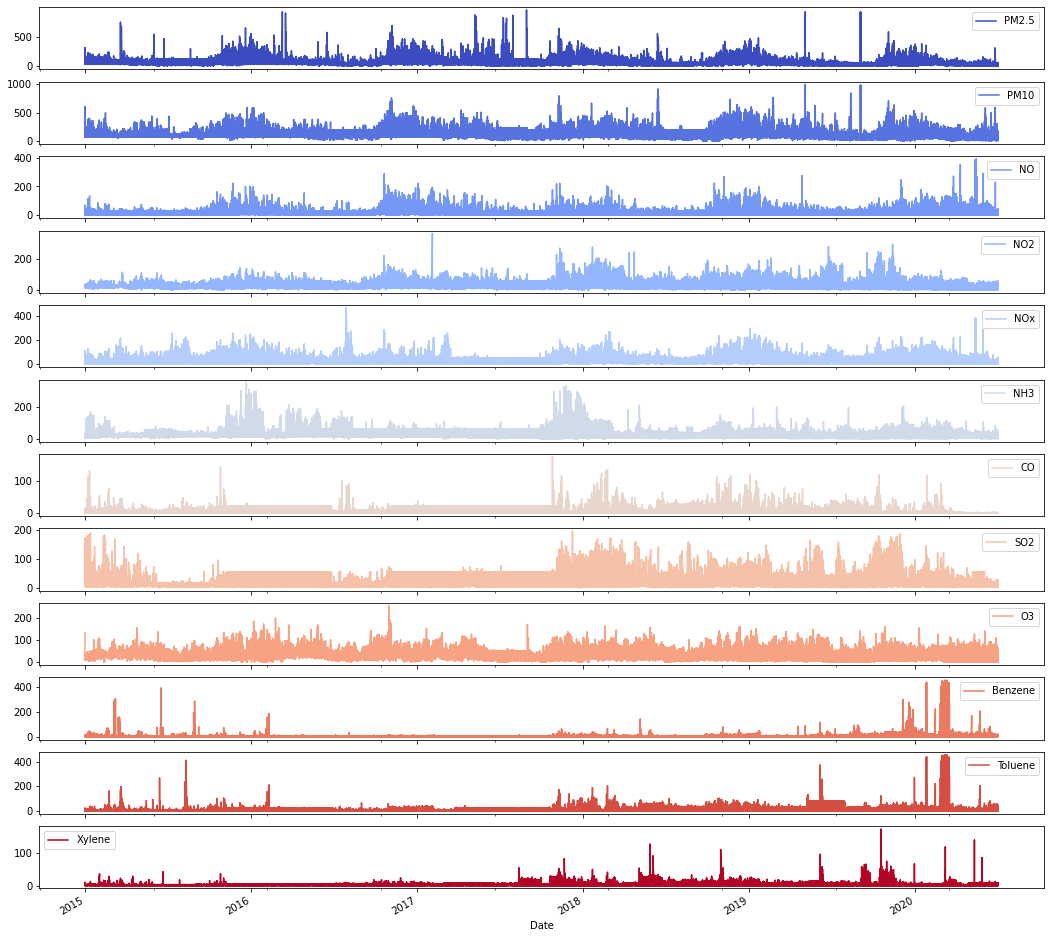

In [ ]:
print('Distribution of different pollutants in last 5 years')
df_city_day.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

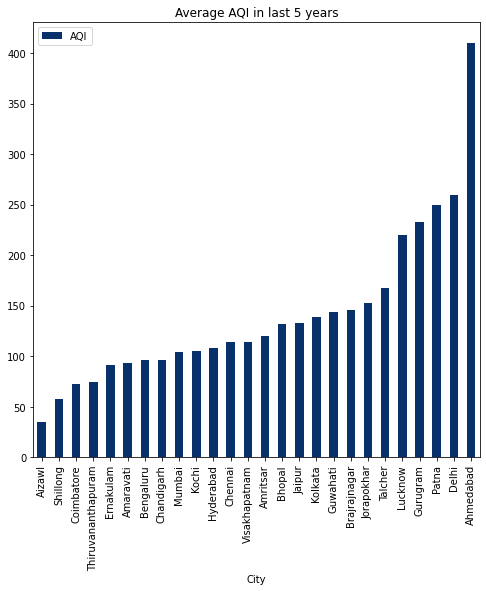

In [ ]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

In [ ]:
final_df= df[['AQI', 'AQI_Bucket']].copy()

In [ ]:
final_df

,AQI,AQI_Bucket
Date,,
2015-01-01,149.0,Moderate
2015-01-02,123.0,Moderate
2015-01-03,300.0,Poor
2015-01-04,123.0,Moderate
2015-01-05,329.0,Very Poor
...,...,...
2020-06-27,41.0,Good
2020-06-28,70.0,Satisfactory
2020-06-29,68.0,Satisfactory


In [ ]:
final_df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [ ]:
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int) #mapping numbers
final_df.head()

,AQI,AQI_Bucket
Date,,
2015-01-01,149.0,2
2015-01-02,123.0,2
2015-01-03,300.0,3
2015-01-04,123.0,2
2015-01-05,329.0,4


In [ ]:
X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Enter the value of AQI:")
AQI = float(input("AQI : "))
output = clf.predict([[AQI]])
output

Enter the value of AQI:
AQI : 1023


array([5])

In [ ]:
#0-->Good
#1-->Satisfactory
#2-->moderate
#3-->poor
#4-->Very poor
#5-->Severe

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       388
           1       1.00      1.00      1.00      2397
           2       1.00      1.00      1.00      2608
           3       1.00      1.00      1.00       805
           4       1.00      1.00      1.00       861
           5       1.00      1.00      1.00       324

    accuracy                           1.00      7383
   macro avg       1.00      1.00      1.00      7383
weighted avg       1.00      1.00      1.00      7383

[[ 388    0    0    0    0    0]
 [   0 2397    0    0    0    0]
 [   0    0 2608    0    0    0]
 [   0    0    0  805    0    0]
 [   0    0    0    0  861    0]
 [   0    0    0    0    0  324]]
